<a href="https://colab.research.google.com/github/2SEHI/Factory-Anomaly-Analysis/blob/main/Display_Sensor_Anomaly_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib의 colab용 한글 폰트설정
# 실행후 런타임 다시 시작하기
!sudo apt-get install -y fonts-nanum
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and di

In [2]:
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
from scipy import stats

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Factory_Anomaly_Detection"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(42)

In [3]:
fact_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/factory_glass_2016.csv', encoding='cp949')
fact_data.head()

,dat...date.name.,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,...,S_C1_C2_L_L,S_C1_C2_L_R,S_C2_C3_U_L,S_C2_C3_U_R,S_C2_C3_L_L,S_C2_C3_L_R,S_C3_C4_U_L,S_C3_C4_U_R,S_C3_C4_L_L,S_C3_C4_L_R,S_AB1_AB11_L,S_AB1_AB11_R,S_AB11_AB7_L,S_AB11_AB7_R,S_AB7_C4_L,S_AB7_C4_R,S_C4_RET_L,S_C4_RET_R,S_RET_F_L,S_RET_F_R,STD_U_L,STD_U_R,STD_L_L,STD_L_R,STD_GLS_L,STD_GLS_R,투입.LEFT.,투입.RIGHT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
0,2016-01-01 07,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.8189,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.73,-1.315444,-1.620631,-1.517655,...,-0.195736,0.706941,1.477203,0.410847,0.491620,0.942180,2.776941,2.492437,2.060406,2.612283,1.726404,1.461145,-1.192642,-1.134471,2.599429,2.690433,-0.365598,-0.659319,-1.963403,-1.621407,0.523950,1.951349,2.248106,2.767676,3.012706,3.069007,80,74,2,5,8,3,11.69,8.75,14.86,11.69,0.025,0.063,0.108,0.041
1,2016-01-01 08,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.8189,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.73,-1.315444,-1.620631,-1.517655,...,-0.500742,0.822657,1.495204,0.397591,0.587871,0.938186,2.888919,2.573187,2.161149,2.664726,1.682081,1.414518,-1.109125,-1.042269,2.588703,2.654307,-0.348979,-0.560103,-1.978936,-1.810022,0.566521,2.010125,2.364418,2.842630,3.022998,3.069274,92,75,0,2,10,0,7.19,2.17,13.33,7.19,0.000,0.022,0.133,0.000
2,2016-01-01 09,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.8189,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.73,-1.315444,-1.620631,-1.517655,...,-0.164556,0.962210,1.552127,0.460702,0.397216,0.843443,2.868644,2.486441,2.183298,2.638130,1.632955,1.359022,-0.986580,-0.928583,2.550175,2.606185,-0.456071,-0.644073,-1.878611,-1.742395,0.545936,2.002820,2.397034,2.817728,2.936967,2.969952,64,66,1,4,0,0,3.85,7.81,0.00,3.85,0.016,0.063,0.000,0.000
3,2016-01-01 10,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.8189,-1.548119,-1.779407,-1.548119,

In [4]:
fact_data.describe()

,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,X1WOS45105_PV,...,S_C1_C2_L_L,S_C1_C2_L_R,S_C2_C3_U_L,S_C2_C3_U_R,S_C2_C3_L_L,S_C2_C3_L_R,S_C3_C4_U_L,S_C3_C4_U_R,S_C3_C4_L_L,S_C3_C4_L_R,S_AB1_AB11_L,S_AB1_AB11_R,S_AB11_AB7_L,S_AB11_AB7_R,S_AB7_C4_L,S_AB7_C4_R,S_C4_RET_L,S_C4_RET_R,S_RET_F_L,S_RET_F_R,STD_U_L,STD_U_R,STD_L_L,STD_L_R,STD_GLS_L,STD_GLS_R,투입.LEFT.,투입.RIGHT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
count,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,...,8144.000000,8144.000000,8145.000000,8145.000000,8144.000000,8144.000000,8145.000000,8145.000000,8144.000000,8144.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000
mean,0.000728,0.000692,0.000705,0.000628,0.000737,0.000618,0.000737,0.000601,0.000738,0.000601,0.000730,0.000601,0.000701,0.000601,0.000701,0.000601,0.000717,0.000601,0.000698,0.000601,0.000698,0.000601,0.000691,0.000601,0.000698,0.000659,0.000661,0.000677,0.000743,0.000672,0.000737,0.000650,0.000617,0.000601,0.000722,-0.000184,-0.001187,-0.000790,-0.000837,-0.000456,...,-0.000529,-0.001111,-0.000501,0.001043,-0.000364,0.000402,0.000242,0.000237,0.000213,0.000425,-0.000673,-0.000881,0.000358,0.000480,0.000159,0.000037,-0.001295,-0.001154,0.000231,-0.000139,0.000351,0.000007,0.000248,0.000409,-0.000434,-0.000518,93.602210,93.680663,1.562799,1.754451,2.217802,0.786004,3.574095,3.720192,3.356119,3.574095,0.018049,0.019174,0.024859,0.008718
std,1.000121,1.000151,1.000140,1.000200,1.000113,1.000207,1.000113,1.000219,1.000113,1.000219,1.000119,1.000219,1.000144,1.000219,1.000144,1.000219,1.000131,1.000219,1.000146,1.000219,1.000146,1.000219,1.000151,1.000219,1.000146,1.000177,1.000175,1.000162,1.000108,1.000167,1.000113,1.000184,1.000208,1.000219,1.000126,1.000407,0.999604,1.000064,1.000020,1.000309,...,1.000248,0.999685,1.000283,0.999794,1.000335,1.000321,1.000386,1.000377,1.000399,1.000305,1.000166,0.999977,1.000354,1.000295,1.000414,1.000428,0.999453,0.999653,1.000398,1.000417,1.0003

### 결측치 확인 
- 전부 Na인 컬럼이 7개 존재하며 1개의 결측치를 가진 컬럼들이 100개 이상 존재함.

In [5]:
x = fact_data.isnull().sum().sort_values(ascending=False)
np.where(x>0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133]),)

- 전체 8145행 중에서 NaN가 8145행인 컬럼은 7개가 존재하므로 컬럼삭제

In [6]:
print(fact_data.isnull().sum().sort_values(ascending=False).head(10))
fact_data = fact_data.dropna(how='all', axis=1)

UPPER.RET..Z218.TMP.1TIC42601.PV         8145
ROOF.HEATING.Zone78.1JIC31178.PV         8145
LEHR.DRV.MTR..M19.2.CUR.1WII40135.PV     8145
ROOF.HEATING.Zone76.1JIC31176.PV         8145
ROOF.HEATING.Zone52.1JIC31152.PV         8145
DCS_Offset_RPM_M14.1WOS45114_PV          8145
DCS_Offset_RPM_M13.1WOS45113_PV          8145
ATM.FLOW.SECT.10.N2.H2.1FIC33418.PV.1       1
DB.HEAT.TOP.4.1.2.TMP.CT.1JI40304.PV        1
DB.HEAT.TOP.6.1.2.TMP.CT.1JI40306.PV        1
dtype: int64


In [7]:
fact_data.isnull().sum().sort_values(ascending=False).head(100)

SEC11.N2.H2.9..1FIC33426.PV.1           1
top_6                                   1
DB.HEAT.TOP.3.1.2.TMP.CT.1JI40303.PV    1
DB.HEAT.TOP.4.1.2.TMP.CT.1JI40304.PV    1
DB.HEAT.TOP.5.1.2.TMP.CT.1JI40305.PV    1
                                       ..
CASHING.HOT.AIR.TMP.1TIC33604.PV        1
X1WOS45107_PV.1                         1
DCS_Offset_RPM_M16.1WOS45116_PV.1       1
DCS_Offset_RPM_M17.1WOS45117_PV.1       1
S_C3_C4_L_R                             1
Length: 100, dtype: int64

## 결측치가 존재하는 행 출력과 삭제
- 3행에 모두 몰려있으므로 행을 삭제한다.

In [8]:
print(fact_data[fact_data.isnull().any(axis=1)])
drop_index = list(fact_data[fact_data.isnull().any(axis=1)].index)
print(drop_index)

# 각 행의 NaN개수
print(fact_data.iloc[3754].isnull().sum())
print(fact_data.iloc[6310].isnull().sum())
print(fact_data.iloc[8044].isnull().sum())

# NaN가 있는 행 삭제
fact_data.drop(index=drop_index, axis=0 , inplace=True)

     dat...date.name.  LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101  ...   R.RD  R.Vac
3754    2016-06-24 04                           1.467846  ...  0.000    0.0
6310    2016-10-13 09                          -0.846817  ...  0.162    0.0
8044    2016-12-27 17                          -0.846817  ...  0.057    0.0

[3 rows x 834 columns]
[3754, 6310, 8044]
1
39
87


In [9]:
fact_data

,dat...date.name.,LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101,LIFT.OUT.ROL.MTR.M2.SPD.1WSI40102,LIFT.OUT.ROL.MTR.M3.SPD.1WSI40103,LEHR.DRV.MTR..M4.1.SPD.1WSI40104,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.1.SPD.1WSI40106,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M6.2.SPD.1WSI40109,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,LEHR.DRV.MTR..M7.2.SPD.1WSI40111,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,LEHR.DRV.MTR..M9.2.SPD.1WSI40115,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M10.2.SPD.1WSI40117,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M12.2.SPD.1WSI40121,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,LEHR.DRV.MTR..M13.2.SPD.1WSI40123,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M14.2.SPD.1WSI40125,LEHR.DRV.MTR..M15.1.SPD.1WSI40126,LEHR.DRV.MTR..M15.2.SPD.1WSI40127,LEHR.DRV.MTR..M16.1.SPD.1WSI40128,DRIVE.MOTOR.M16.2.SPEED.1WSI40129,LEHR.DRV.MTR..M17.1.SPD.1WSI40130,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,LEHR.DRV.MTR..M18.1.SPD.1WSI40132,LEHR.DRV.MTR..M18.2.SPD.1WSI40133,DRIVE.MOTOR.M19.1.SPEED.1WSI40134,LEHR.DRV.MTR..M19.2.SPD.1WSI40135,X1WOS45101_PV,X1WOS45102_PV,X1WOS45103_PV,X1WOS45104_PV,...,S_C1_C2_L_L,S_C1_C2_L_R,S_C2_C3_U_L,S_C2_C3_U_R,S_C2_C3_L_L,S_C2_C3_L_R,S_C3_C4_U_L,S_C3_C4_U_R,S_C3_C4_L_L,S_C3_C4_L_R,S_AB1_AB11_L,S_AB1_AB11_R,S_AB11_AB7_L,S_AB11_AB7_R,S_AB7_C4_L,S_AB7_C4_R,S_C4_RET_L,S_C4_RET_R,S_RET_F_L,S_RET_F_R,STD_U_L,STD_U_R,STD_L_L,STD_L_R,STD_GLS_L,STD_GLS_R,투입.LEFT.,투입.RIGHT.,ROLLDOWN.폐기.LEFT.,진공패드.폐기.LEFT.,ROLLDOWN.폐기.RIGHT.,진공패드.폐기.RIGHT.,폐기율...,ROLLDOWN.진공패드.폐기율..LEFT.,ROLLDOWN.진공패드.폐기율..RIGHT.,ROLLDOWN.진공패드.폐기율..전체.,L.RD,L.Vac,R.RD,R.Vac
0,2016-01-01 07,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,...,-0.195736,0.706941,1.477203,0.410847,0.491620,0.942180,2.776941,2.492437,2.060406,2.612283,1.726404,1.461145,-1.192642,-1.134471,2.599429,2.690433,-0.365598,-0.659319,-1.963403,-1.621407,0.523950,1.951349,2.248106,2.767676,3.012706,3.069007,80,74,2,5,8,3,11.69,8.75,14.86,11.69,0.025,0.063,0.108,0.041
1,2016-01-01 08,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,...,-0.500742,0.822657,1.495204,0.397591,0.587871,0.938186,2.888919,2.573187,2.161149,2.664726,1.682081,1.414518,-1.109125,-1.042269,2.588703,2.654307,-0.348979,-0.560103,-1.978936,-1.810022,0.566521,2.010125,2.364418,2.842630,3.022998,3.069274,92,75,0,2,10,0,7.19,2.17,13.33,7.19,0.000,0.022,0.133,0.000
2,2016-01-01 09,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,-1.779407,-1.548119,-1.779407,-1.548119,-1.806012,-1.548119,-1.775051,-1.548119,-1.776634,-1.548119,-1.766604,-1.548119,-1.775051,-1.638207,-1.728206,-1.674911,-1.641818,-1.662151,-1.636293,-1.622314,-1.653428,-1.548119,-1.807954,-1.730000,-1.315444,-1.620631,-1.517655,...,-0.164556,0.962210,1.552127,0.460702,0.397216,0.843443,2.868644,2.486441,2.183298,2.638130,1.632955,1.359022,-0.986580,-0.928583,2.550175,2.606185,-0.456071,-0.644073,-1.878611,-1.742395,0.545936,2.002820,2.397034,2.817728,2.936967,2.969952,64,66,1,4,0,0,3.85,7.81,0.00,3.85,0.016,0.063,0.000,0.000
3,2016-01-01 10,-1.772682,-1.713219,-1.734851,-1.590051,-1.636293,-1.575213,-1.636293,-1.548119,-1.824581,-1.548119,-1.818900,-1.548119,

## 상관관계를 모두 저장
- 총 10분 소요

In [10]:
# 모든 컬럼에 대한 상관계수를 저장하는 함수
def get_coef(start_num, end_num):
    # 컬럼1, 컬럼2, 상관계수를 담는 list
    corr_tp = []

    # 두 컬럼의 상관계수를 구하는 for문
    for i in range(start_num, end_num):
        for j in range(i+1, len(columns_all)):
            # 상관계수 저장
            c = fact_data[[columns_all[i],columns_all[j]]].corr().abs()
            # DataFrame을 Series로 변환
            s = c.unstack()
            # 정렬(가장 높은 상관계수는 자기 자신이므로 3또는 4번째가 두 컬럼의 상관계수)
            so = s.sort_values(kind="quicksort", ascending=False)
            # (컬럼1, 컬럼2, 상관계수)를 list에 저장
            # 가장 높은 상관계수는 자기 자신이므로 3또는 4번째가 두 컬럼의 상관계수
            corr_tp.append((columns_all[i],columns_all[j],so[3]))
    return corr_tp


In [11]:
# date와 폐기율 컬럼 제외 
drop_columns = ['dat...date.name.', '투입.LEFT.','투입.RIGHT.','ROLLDOWN.폐기.LEFT.','진공패드.폐기.LEFT.','ROLLDOWN.폐기.RIGHT.','진공패드.폐기.RIGHT.','폐기율...','ROLLDOWN.진공패드.폐기율..LEFT.','ROLLDOWN.진공패드.폐기율..RIGHT.','ROLLDOWN.진공패드.폐기율..전체.','L.RD','L.Vac','R.RD','R.Vac',]
# 모든 컬럼의 이름
columns_all = np.array(fact_data.drop(columns=drop_columns).columns)
#*************************************
# start_num : 시작 컬럼 index
# end_num : 마지막 컬럼 index
#*************************************
coef_list_1 = get_coef(0, 100)
coef_list_2 = get_coef(100, 200)
coef_list_3 = get_coef(200, 300)
coef_list_4 = get_coef(300, 500)
coef_list_5 = get_coef(500, 700)
coef_list_6 = get_coef(700, len(columns_all))

# 상관계수가 1.0인 튜플 구하기

In [12]:
same1 = []
same1.extend([i for i in coef_list_1 if 1.0 in i])
same1.extend([i for i in coef_list_2 if 1.0 in i])
same1.extend([i for i in coef_list_3 if 1.0 in i])
same1.extend([i for i in coef_list_4 if 1.0 in i])
same1.extend([i for i in coef_list_5 if 1.0 in i])
same1.extend([i for i in coef_list_6 if 1.0 in i])
print(len(same1))
same_coef_frame = pd.DataFrame(same1, columns=['col1','col2','coef'])
same_coef_frame

102


,col1,col2,coef
0,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,1.0
1,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,1.0
2,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M17.2.SPD.1WSI40131,1.0
3,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,1.0
4,LEHR.DRV.MTR..M6.1.SPD.1WSI40108,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,1.0
...,...,...,...
97,LEHR.DRV.MTR..M14.1.CUR.1WII40124.PV,TMP.TIN..BAY.4.LEFT.1TI30203.PV,1.0
98,LEHR.DRV.MTR..M14.2.CUR.1WII40125.PV,LEHR.DRV.MTR..M15.2.CUR.1WII40127.PV,1.0
99,LEHR.DRV.MTR..M17.2.CUR.1WII40131.PV,TMP.TIN..BAY.4.LEFT.1TI30203.PV,1.0
100,TMP.TIN..BAY.1.LEFT.1TI30201.PV,l_tin_bay_1_4,1.0


In [24]:
same_coef_frame.to_csv('/content/drive/MyDrive/Colab Notebooks/data/same_coef_frame.csv')


In [14]:
# 상관계수가 1.0인 튜플의 유니크한 컬럼명 리스트
high_coef_col = same_coef_frame['col1'].values
np.append(high_coef_col, same_coef_frame['col2'].values)
# set(list1)

array(['LEHR.DRV.MTR..M4.2.SPD.1WSI40105',
       'LEHR.DRV.MTR..M4.2.SPD.1WSI40105',
       'LEHR.DRV.MTR..M5.2.SPD.1WSI40107',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M6.1.SPD.1WSI40108',
       'LEHR.DRV.MTR..M7.1.SPD.1WSI40110',
       'LEHR.DRV.MTR..M7.1.SPD.1WSI40110',
       'LEHR.DRV.MTR..M7.1.SPD.1WSI40110',
       'LEHR.DRV.MTR..M7.1.SPD.1WSI40110',
       'LEHR.DRV.MTR..M7.1.SPD.1WSI40110',
       'LEHR.DRV.MTR..M7.1.SPD.1WSI40110',
       'LEHR.DRV.MTR..M7.1.SPD.1WSI40110',
       'LEHR.DRV.MTR..M7.1.SPD.1WSI40110',
       'LEHR.DRV.MTR..M8.1.SPD.1WSI40112',
       'LEHR.DRV.MTR..M8.1.SPD.1WSI40112',
       'LEHR.DRV.MTR..M8.1.SPD.1WSI40112',
       'LEH

# 연속형 기술통계량
- 평균
- 중위수
- 최빈값
- 산포도
- 분포도 : 왜도, 첨도
- 분산
- 범위

## 중심경향성
- 상관계수가 1.0이었던 컬럼에 대해 통계량 구해보기

In [15]:
pd.DataFrame(same_coef_frame, columns=['col1','col2','coef'])
high_col_name = set(same_coef_frame['col1'])
high_col_name
fact_data[high_col_name].describe()

,LEHR.DRV.MTR..M10.1.CUR.1WII40116.PV,X1WOS45109_PV,LEHR.DRV.MTR..M14.2.CUR.1WII40125.PV,ATM.FLOW.SECT.9.N2.H2.1FIC33416.PV,LEHR.DRV.MTR..M11.1.SPD.1WSI40118,LEHR.DRV.MTR..M9.1.SPD.1WSI40114,DAMP.POSITION.4.BAY.CTRL.1TIC33424.PV,TMP.TIN..BAY.5.LEFT.1TI30205.PV,LEHR.DRV.MTR..M7.1.SPD.1WSI40110,X1WOS45107_PV,DRIVE.MOTOR.M10.1.SPEED.1WSI40116,LEHR.DRV.MTR..M14.1.CUR.1WII40124.PV,LEHR.DRV.MTR..M12.1.SPD.1WSI40120,LEHR.DRV.MTR..M13.2.CUR.1WII40123.PV,DAMP.POSITION.3.BAY.CTRL.1TIC33423.PV,ATM.FLOW.SECT.9.N2.1FIC33415.PV,LEHR.DRV.MTR..M9.2.CUR.1WII40115.PV,DRIVE.MOTOR.M11.2.SPEED.1WSI40119,LEHR.DRV.MTR..M13.1.SPD.1WSI40122,TMP.TIN..BAY.1.LEFT.1TI30201.PV,LEHR.DRV.MTR..M8.1.SPD.1WSI40112,DAMP.POSITION.7.BAY.CTRL.1TIC33427.PV,LEHR.DRV.MTR..M17.2.CUR.1WII40131.PV,ATM.FLOW.SECT.8.N2.H2.1FI33414.PV,LEHR.DRV.MTR..M4.2.CUR.1WII40105.PV,LEHR.DRV.MTR..M11.2.CUR.1WII40119.PV,LEHR.DRV.MTR..M12.2.CUR.1WII40121.PV,X1WOS45108_PV,DAMP.POSITION.5BAY.CTRL.1TIC33425.PV,LEHR.DRV.MTR..M4.2.SPD.1WSI40105,LEHR.DRV.MTR..M8.2.SPD.1WSI40113,ATM.FLOW.SECT.6.N2.H2.1FI33410.PV,LEHR.DRV.MTR..M5.2.SPD.1WSI40107,LEHR.DRV.MTR..M14.1.SPD.1WSI40124,LEHR.DRV.MTR..M9.1.CUR.1WII40114.PV,ATM.FLOW.SECT.7.N2.H2.1FI33412.PV,LEHR.DRV.MTR..M6.1.SPD.1WSI40108
count,8.142000e+03,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8.142000e+03,8142.000000,8142.000000,8142.000000,8142.000000,8.142000e+03,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8.142000e+03,8142.000000,8.142000e+03,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8.142000e+03,8142.000000,8142.000000
mean,-9.999387e-01,-0.000095,-0.000468,-0.000659,0.000599,0.000599,0.000117,0.001385,0.000599,-0.000095,0.000599,-9.999387e-01,0.000599,-0.000468,0.000117,-0.002812,-9.999387e-01,0.000722,0.000599,0.000414,0.000599,0.000599,-9.999387e-01,-0.001982,-9.999387e-01,-0.000468,-0.000468,-0.000095,0.000117,0.000767,0.000725,-0.000659,0.000767,0.000599,-9.999387e-01,-0.000659,0.000599
std,8.671374e-14,1.000610,1.000525,1.000437,1.000219,1.000219,1.000516,0.999652,1.000219,1.000610,1.000219,8.671374e-14,1.000219,1.000525,1.000516,0.996499,8.671374e-14,1.000123,1.000219,1.000120,1.000219,1.000226,8.671374e-14,0.998861,8.671374e-14,1.000525,1.000525,1.000610,1.000516,1.000073,1.000120,1.000437,1.000073,1.000219,8.671374e-14,1.000437,1.000219
min,-9.999387e-01,-12.992791,-2.625020,-1.862491,-2.679576,-2.679576,-1.256426,-2.625216,-2.679576,-12.992791,-2.679576,-9.999387e-01,-2.679576,-2.625020,-1.256426,-0.745351,-9.999387e-01,-1.775051,-2.679576,-2.059885,-2.679576,-1.193506,-9.999387e-01,-1.624702,-9.999387e-01,-2.625020,-2.625020,-12.992791,-1.256426,-1.636293,-1.779407,-1.862491,-1.636293,-2.679576,-9.999387e-01,-1.862491,-2.679576
25%,-9.999387e-01,0.076956,0.380903,0.536849,-0.699527,-0.699527,-1.256426,-0.464676,-0.699527,0.076956,-0.699527,-9.999387e-01,-0.699527,0.380903,-1.256426,-0.745351,-9.999387e-01,-0.812423,-0.699527,-0.676964,-0.699527,-1.193506,-9.999387e-01,0.219432,-9.999387e-01,0.380903,0.380903,0.076956,-1.256426,-0.857942,-0.815443,0.536849,-0.857942,-0.699527,-9.999387e-01,0.536849,-0.699527
50%,-9.999387e-01,0.076956,0.380903,0.536849,-0.699527,-0.699527,0.033872,-0.071283,-0.699527,0.076956,-0.699527,-9.999387e-01,-0.699527,0.380903,0.033872,-0.022694,-9.999387e-01,-0.331110,-0.699527,-0.272216,-0.699527,-0.016935,-9.999387e-01,0.219432,-9.999387e-01,0.380903,0.380903,0.076956,0.033872,-0.390932,-0.333461,0.536849,-0.390932,-0.699527,-9.999387e-01,0.536849,-0.699527
75%,-9.999387e-01,0.076956,0.380903,0.536849,0.997658,0.997658,1.001595,0.427284,0.997658,0.076956,0.997658,-9.999387e-01,0.997658,0.380903,1.001595,-0.022694,-9.999387e-01,1.112831,0.997658,0.532473,0.997658,0.767446,-9.999387e-01,0.219432,-9.999387e-01,0.380903,0.380903,0.076956,1.001595,1.010099,1.112484,0.536849,1.010099,0.997658,-9.999387e-01,0.536849,0.997658
max,-9.999387e-01,0.076956,0.38090

In [16]:
## 중앙값 : median()
print(same_coef_frame.median())

# 최빈값 : scipy의 mode()를 이용
print(stats.mode(fact_data['LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101'])[0])

# 범위 : max() - min()
np.max(fact_data['LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101']) - np.min(fact_data['LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101'])

coef    1.0
dtype: float64
[-0.84681669]


4.320703481

## 분산도

In [17]:
# 분산 var()
print(np.var(fact_data['LIFT.OUT.ROL.MTR.M1.SPD.1WSI40101']))


1.0000475179378774


## 표준 편차

In [18]:
same_coef_frame = pd.DataFrame(same1, columns=['col1','col2','coef'])
same_coef_frame
fact_data[columns_all].values

array([[-1.77268172, -1.7132192 , -1.73485143, ...,  2.76767591,
         3.01270568,  3.06900681],
       [-1.77268172, -1.7132192 , -1.73485143, ...,  2.84263048,
         3.0229976 ,  3.06927395],
       [-1.77268172, -1.7132192 , -1.73485143, ...,  2.81772837,
         2.93696741,  2.9699516 ],
       ...,
       [-0.84681669, -0.80490995, -0.8203074 , ..., -0.32542638,
         0.54317167,  0.61708071],
       [-0.84681669, -0.80490995, -0.8203074 , ..., -0.34653992,
         0.4620593 ,  0.58815582],
       [-0.84681669, -0.80490995, -0.8203074 , ..., -0.28843177,
         0.51833202,  0.63943252]])

## VIF계수 출력
- ⭐소요시간 약 40분이므로 csv파일 받아서 하기⭐

### 다중공선성 해결 방법
1. VIF(분산팽창요인)으로 다중공선성 확인
2. Feature Importance 확인
3. 회귀분석모델 수행후, 정확성과 loss함수 확인

- 다중공선성이 높다고 feature를 무조건 제거하면 안됨. 
- 두 컬럼의 평균값으로 대치한다???? => PCA





In [19]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처마다의 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(fact_data[columns_all].values, i) for i in range(fact_data[columns_all].values.shape[1])]
vif["features"] = fact_data[columns_all].columns
vif

## 분산팽창 파일 저장
# vifdf = vif.sort_values(by="VIF Factor",ascending=False).round(1)
# vifdf.to_csv('/content/drive/MyDrive/Colab Notebooks/data/vifdf.csv')

vifdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/vifdf.csv', usecols=[1,2])
vifdf

,VIF Factor,features
0,7.901052e+13,LOWER.AB3.Z41.TMP.1TIC41356.PV
1,7.698461e+13,D_AB1_L_UL
2,6.169315e+13,DCS_Offset_RPM_M12.1WOS45112_PV
3,5.811096e+13,UPPER.AB1.Z2.TMP.1TIC41102.PV
4,5.267368e+13,UPPER.AB4.Z44.TMP.1TIC41402.PV
...,...,...
814,0.000000e+00,LEHR.DRV.MTR..M9.2.CUR.1WII40115.PV
815,0.000000e+00,TMP.TIN..BAY.4.LEFT.1TI30203.PV
816,0.000000e+00,LEHR.DRV.MTR..M4.2.CUR.1WII40105.PV
817,0.000000e+00,LEHR.DRV.MTR..M9.1.CUR.1WII40114.PV


In [20]:
vifdf.iloc[:10,:]

,VIF Factor,features
0,7.901052e+13,LOWER.AB3.Z41.TMP.1TIC41356.PV
1,7.698461e+13,D_AB1_L_UL
2,6.169315e+13,DCS_Offset_RPM_M12.1WOS45112_PV
3,5.811096e+13,UPPER.AB1.Z2.TMP.1TIC41102.PV
4,5.267368e+13,UPPER.AB4.Z44.TMP.1TIC41402.PV
5,5.146971e+13,UPPER.AB3.Z29.TMP.1TIC41301.PV
6,5.146971e+13,S_AB11_C1_U_L
7,5.060224e+13,LOWER.AB2.Z27.TMP.1TIC41256.PV
8,5.060224e+13,UPPER.AB4.Z45TMP.1TIC41403.PV
9,4.921967e+13,TMP.GLASS..ZONE.F.E1.1TI40251.PV


### VIF가 10이상인 데이터만 추출해보기

In [21]:
high_vif_col = np.where(np.array(vifdf.iloc[:,0]) > 10)

vifdf.iloc[:len(list(high_vif_col[0])),:]

,VIF Factor,features
0,7.901052e+13,LOWER.AB3.Z41.TMP.1TIC41356.PV
1,7.698461e+13,D_AB1_L_UL
2,6.169315e+13,DCS_Offset_RPM_M12.1WOS45112_PV
3,5.811096e+13,UPPER.AB1.Z2.TMP.1TIC41102.PV
4,5.267368e+13,UPPER.AB4.Z44.TMP.1TIC41402.PV
...,...,...
776,1.810000e+01,LOR.3.R.Axis
777,1.440000e+01,LOR.2.L.Axis
778,1.370000e+01,LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV
779,1.370000e+01,ATM.FLOW.SECT.2.N2.1FI33401.PV


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


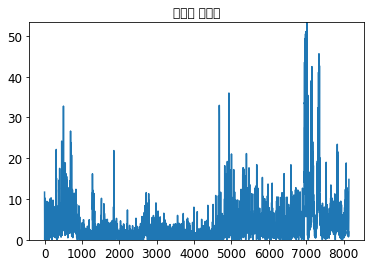

In [22]:
plt.title('시간별 폐기율')
plt.plot(fact_data['폐기율...'])
plt.ylim([0, fact_data['폐기율...'].max()])
plt.show()

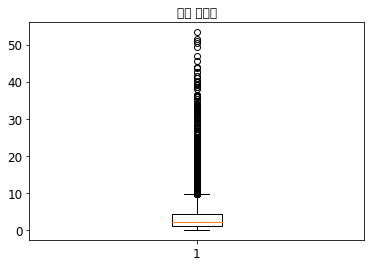

In [23]:
plt.title('일별 폐기율')
plt.boxplot(fact_data['폐기율...'])
plt.show()